# Tutorial 1
Intial imports:

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau

## Week 1
### Task 1

In [2]:
# Sheet name doesn't have to be specified as there is only one sheet in the folder
df = pd.read_excel('Cell-Cycle-Set.xlsx', sheet_name=0) 

# This drops any rows or columns with NaN values
df.dropna(inplace=True)
df

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...
...,...,...,...,...,...,...,...,...,...,...
494,ALDH1B1,11.115773,11.158333,11.434383,26.024680,23.865020,26.095450,alcohol metabolic process;biological regulatio...,aldehyde dehydrogenase (NAD) activity;aldehyde...,cell part;cytoplasmic part;cytosol;intracellul...
495,MRPL12,11.251870,11.351043,11.255327,26.739813,24.989527,27.104197,alcohol biosynthetic process;alcohol metabolic...,binding;nucleic acid binding;protein binding;R...,cell part;cytoplasmic part;integral to membran...
496,NQO1,13.013263,13.179313,13.048477,28.422773,25.464497,28.879273,biological regulation;biosynthetic process;cel...,binding;catalytic activity;coenzyme binding;co...,cell part;cytoplasmic part;cytosol;intracellul...
497,IFIT3,9.048456,8.599903,9.105025,23.592930,19.960053,23.599087,biological regulation;cell surface receptor li...,binding;protein binding,cell part;cytoplasmic part;cytosol;intracellul...


### Task 2
#### Task 2.1

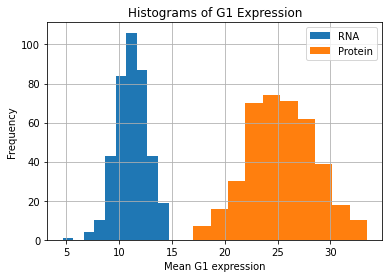

In [3]:
# Creating a figure to have multiple histograms on it
fig, ax1 = plt.subplots()

# Adding two histograms to one figure
ax1.hist(df.mean_RNA_G1, label='RNA')
ax1.hist(df.mean_protein_G1, label='Protein')

# Shows legend
ax1.legend()

# Shows grid lines
plt.grid()

#labelling axes and adding title
ax1.set_title('Histograms of G1 Expression')
ax1.set_xlabel('Mean G1 expression')
ax1.set_ylabel('Frequency')

# Must use show() otherwise the histogram will not be presented
plt.show()

The histograms for both RNA and protein are symmetric. The spread(variance) for RNA G1 is approximately 10(14-4) which is less than the spread for protein G1 which is approximately 16(33-17). The RNA G1 histogram may also contain an outlier around 4.

#### Task 2.2

In [4]:
# corr returns a tuple. The first value is the correlation and the second is the probability that two uncorrelated 
# variables would return the same result
g1Pearson = df['mean_RNA_G1'].corr(df['mean_protein_G1'], method=pearsonr)[0]
g1Spearman = df['mean_RNA_G1'].corr(df['mean_protein_G1'], method=spearmanr)[0]
g1Kendall = df['mean_RNA_G1'].corr(df['mean_protein_G1'], method=kendalltau)[0]

sPearson = df['mean_RNA_S'].corr(df['mean_protein_S'], method=pearsonr)[0]
sSpearman = df['mean_RNA_S'].corr(df['mean_protein_S'], method=spearmanr)[0]
sKendall = df['mean_RNA_S'].corr(df['mean_protein_S'], method=kendalltau)[0]


g2Pearson = df['mean_RNA_G2'].corr(df['mean_protein_G2'], method=pearsonr)[0]
g2Spearman = df['mean_RNA_G2'].corr(df['mean_protein_G2'], method=spearmanr)[0]
g2Kendall = df['mean_RNA_G2'].corr(df['mean_protein_G2'], method=kendalltau)[0]

print('''G1 RNA and Protein correlation:\n 	Pearson = %f\n 	Spearman = %f\n 	Kendall = %f
S RNA and Protein correlation:\n 	Pearson = %f\n 	Spearman = %f\n 	Kendall = %f
G2 RNA and Protein correlation:\n 	Pearson = %f\n 	Spearman = %f\n 	Kendall = %f'''
	% (g1Pearson, g1Spearman, g1Kendall, sPearson, sSpearman, sKendall, g2Pearson, g2Spearman, g2Kendall))

G1 RNA and Protein correlation:
 	Pearson = 0.522658
 	Spearman = 0.513322
 	Kendall = 0.363484
S RNA and Protein correlation:
 	Pearson = 0.536190
 	Spearman = 0.522750
 	Kendall = 0.372022
G2 RNA and Protein correlation:
 	Pearson = 0.532565
 	Spearman = 0.525914
 	Kendall = 0.374195


For each related pair of RNA and protein, the correlations computed from Pearson and Spearman's methods are quite close but Kendall's method results in a correlation coefficient that differs significantly. There's a number of reasons why this difference may occur. For example, Pearson's correlation coefficient is best suited to data that is normally distributed (fits a bell curve) so if the data is not it could lead to an incorrect result and also Pearson's method is greatly affected by outliers so not removing these before calculating can affect the result as well. Neither of these things are the case for Kendall's Tau.

#### Task 2.3

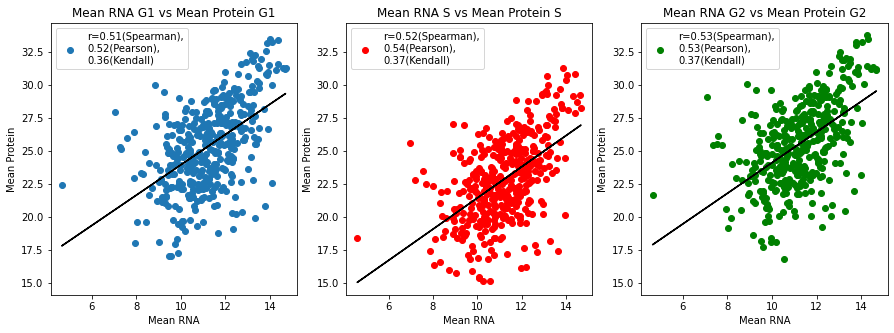

In [36]:
# (ax2, ax3, ax4) means three sets of axes will be shown in one row
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(15,5)
ax2.scatter(df.mean_RNA_G1, df.mean_protein_G1, label='r={:0.2f}(Spearman),'.format(
            g1Spearman) + '\n{:0.2f}(Pearson),'.format(g1Pearson) + '\n{:0.2f}(Kendall)'.format(g1Kendall))
ax2.set_title('Mean RNA G1 vs Mean Protein G1')
ax2.set_xlabel('Mean RNA')
ax2.set_ylabel('Mean Protein')

ax3.scatter(df.mean_RNA_S, df.mean_protein_S, color='red', label='r={:0.2f}(Spearman),'.format(
            sSpearman) + '\n{:0.2f}(Pearson),'.format(sPearson) + '\n{:0.2f}(Kendall)'.format(sKendall))
ax3.set_title('Mean RNA S vs Mean Protein S')
ax3.set_xlabel('Mean RNA')
ax3.set_ylabel('Mean Protein')

ax4.scatter(df.mean_RNA_G2, df.mean_protein_G2, color='green', label='r={:0.2f}(Spearman),'.format(
            g2Spearman) + '\n{:0.2f}(Pearson),'.format(g2Pearson) + '\n{:0.2f}(Kendall)'.format(g2Kendall))
ax4.set_title('Mean RNA G2 vs Mean Protein G2')
ax4.set_xlabel('Mean RNA')
ax4.set_ylabel('Mean Protein')

ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax3.yaxis.set_tick_params(which='both', labelbottom=True)
ax4.yaxis.set_tick_params(which='both', labelbottom=True)

ax2.legend()
ax3.legend()
ax4.legend()

# Computing lines of bestfit
m, c = np.polyfit(df.mean_RNA_G1, df.mean_protein_G1, 1)
ax2.plot(df.mean_RNA_G1, m*(df.mean_RNA_G1)+c, color='black') 

m, c = np.polyfit(df.mean_RNA_S, df.mean_protein_S, 1)
ax3.plot(df.mean_RNA_S, m*(df.mean_RNA_S)+c, color='black') 

m, c = np.polyfit(df.mean_RNA_G2, df.mean_protein_G2, 1)
ax4.plot(df.mean_RNA_G2, m*(df.mean_RNA_G2)+c, color='black') 

plt.show()

Spearman, Kendall and Pearson coefficients all range between -1 and 1. 1 indicates the strongest positive correlation, -1 indicates the strongest negative correlation and 0 indicates no correlation. The results generated from each of the three methods for each of the three pairs of protein and RNA are positive indicating a positive correlation. This means to some degree the mean RNA can be used to calculate a mean protein value, at least for the genes given in the spreadsheet, and if outliers were excluded from the data this reliability could increase.

## Week 2
### Task 1

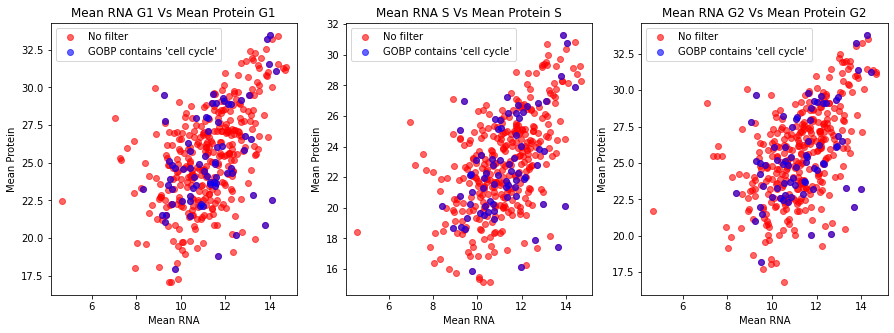

G1 Pearson correlation where GOBP contains 'cell cycle' = 0.436546
S Pearson correlation where GOBP contains 'cell cycle' = 0.438388
G2 Pearson correlation where GOBP contains 'cell cycle' = 0.453327


In [6]:
# gobp contains entries from the sheet where there GOBP field contains 'cell cycle'
gobp = df[df.GOBP.str.contains('cell cycle')]
fig, ax5 = plt.subplots(1,3)
fig.set_size_inches(15,5)

# You can index on one axes variable to create multiple axes but the number must be specified in subplots
# Note that a marker field can be added in scatter to change the shape of plots
# alpha can be used as a fiels in scatter to change the transparency of plots
ax5[0].scatter(df.mean_RNA_G1, df.mean_protein_G1, color='red', label='No filter', alpha=0.6)
ax5[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='blue', label='GOBP contains \'cell cycle\'', alpha=0.6)
ax5[0].set_title('Mean RNA G1 Vs Mean Protein G1')
ax5[0].set_ylabel('Mean Protein')
ax5[0].set_xlabel('Mean RNA')
ax5[0].legend()

ax5[1].scatter(df.mean_RNA_S, df.mean_protein_S, color='red', label='No filter', alpha=0.6)
ax5[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='blue', label='GOBP contains \'cell cycle\'', alpha=0.6)
ax5[1].set_title('Mean RNA S Vs Mean Protein S')
ax5[1].set_ylabel('Mean Protein')
ax5[1].set_xlabel('Mean RNA')
ax5[1].legend()

ax5[2].scatter(df.mean_RNA_G2, df.mean_protein_G2, color='red', label='No filter', alpha=0.6)
ax5[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='blue', label='GOBP contains \'cell cycle\'',alpha=0.6)
ax5[2].set_title('Mean RNA G2 Vs Mean Protein G2')
ax5[2].set_ylabel('Mean Protein')
ax5[2].set_xlabel('Mean RNA')
ax5[2].legend()

plt.show()

gobpG1Pearson = gobp['mean_protein_G1'].corr(gobp['mean_RNA_G1'], method=pearsonr)[0]
gobpSPearson = gobp['mean_protein_S'].corr(gobp['mean_RNA_S'], method=pearsonr)[0]
gobpG2Pearson = gobp['mean_protein_G2'].corr(gobp['mean_RNA_G2'], method=pearsonr)[0]

print('''G1 Pearson correlation where GOBP contains \'cell cycle\' = %f
S Pearson correlation where GOBP contains \'cell cycle\' = %f
G2 Pearson correlation where GOBP contains \'cell cycle\' = %f'''% (gobpG1Pearson, gobpSPearson, gobpG2Pearson))

The Pearson correlations for G1, S and G2 of the original data was 0.52, 0.54 and 0.53 respectively to two decimal places. These are all higher correlations than that of the data where RNA and protein was only extracted from entries where 'cell cycle' was found in the GOBP field.

### Task 2

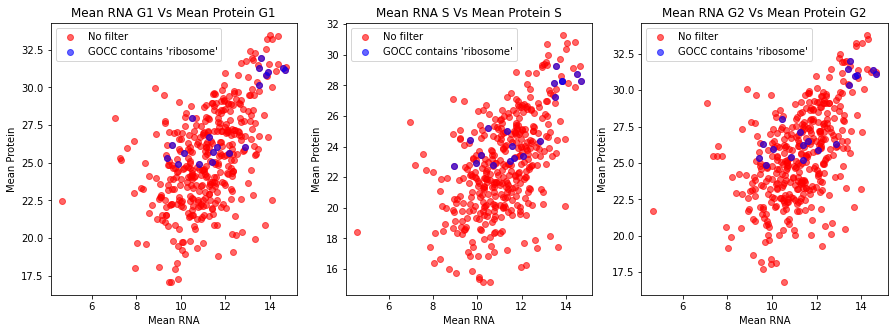

G1 Pearson correlation where GOCC contains 'ribosome' = 0.840801
S Pearson correlation where GOCC contains 'ribosome' = 0.844801
G2 Pearson correlation where GOCC contains 'ribosome' = 0.847706


In [7]:
# gocc contains entries from the sheet where there GOBP field contains 'ribosome'
gocc = df[df.GOCC.str.contains('ribosome')]
fig, ax6 = plt.subplots(1,3)
fig.set_size_inches(15,5)

# Note that a marker field can be added in scatter to change the shape of plots
ax6[0].scatter(df.mean_RNA_G1, df.mean_protein_G1, color='red', label='No filter', alpha=0.6)
ax6[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='blue', label='GOCC contains \'ribosome\'', alpha=0.6)
ax6[0].set_title('Mean RNA G1 Vs Mean Protein G1')
ax6[0].set_ylabel('Mean Protein')
ax6[0].set_xlabel('Mean RNA')
ax6[0].legend()

ax6[1].scatter(df.mean_RNA_S, df.mean_protein_S, color='red', label='No filter', alpha=0.6)
ax6[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='blue', label='GOCC contains \'ribosome\'', alpha=0.6)
ax6[1].set_title('Mean RNA S Vs Mean Protein S')
ax6[1].set_ylabel('Mean Protein')
ax6[1].set_xlabel('Mean RNA')
ax6[1].legend()

ax6[2].scatter(df.mean_RNA_G2, df.mean_protein_G2, color='red', label='No filter', alpha=0.6)
ax6[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='blue', label='GOCC contains \'ribosome\'', alpha=0.6)
ax6[2].set_title('Mean RNA G2 Vs Mean Protein G2')
ax6[2].set_ylabel('Mean Protein')
ax6[2].set_xlabel('Mean RNA')
ax6[2].legend()

plt.show()

goccG1Pearson = gocc['mean_protein_G1'].corr(gocc['mean_RNA_G1'], method=pearsonr)[0]
goccSPearson = gocc['mean_protein_S'].corr(gocc['mean_RNA_S'], method=pearsonr)[0]
goccG2Pearson = gocc['mean_protein_G2'].corr(gocc['mean_RNA_G2'], method=pearsonr)[0]

print('''G1 Pearson correlation where GOCC contains \'ribosome\' = %f
S Pearson correlation where GOCC contains \'ribosome\' = %f
G2 Pearson correlation where GOCC contains \'ribosome\' = %f'''% (goccG1Pearson, goccSPearson, goccG2Pearson))


The Pearson correlations for G1, S and G2 of the original data was 0.52, 0.54 and 0.53 respectively to two decimal places. These are all lower correlations than that of the data where RNA and protein was only extracted from entries where 'ribosome' was found in the GOCC field. The differnece between the GOCC correlations and the standard correlations is greater than the difference between the GOBP correlations and the standard correlations.

### Task 3

In [8]:
"""
expand = true will return a dataframe where for each entry each word from the GOBP field will be in a separate
column, whereas expand = false would return a series(a type of list) of GOBP terms for each entry in one column. 
stack() reformats this new dataframe so that there will essentially be one column with subsections(indexes)
for each GOBP term the entry has. value_counts() counts across all entries how many times a GOBP term appears.
""" 
print(df.GOBP.str.split(';',expand=True).stack().value_counts())

cellular process                  377
metabolic process                 273
cellular metabolic process        260
primary metabolic process         255
biological regulation             236
                                 ... 
rRNA import into mitochondrion      1
RNA import into mitochondrion       1
cyanate metabolic process           1
cyanate catabolic process           1
response to interferon-alpha        1
Length: 2854, dtype: int64


The difficulty with the terms used in the GOBP is that some of them are overarching terms. For example, primary metabolic processes come under metabolic processes and metabolic processes come under cellular processes. Eseesentially different terms are being used to describe similar/ the same thing, there should be some standardisation in the terms used.

### Task 4

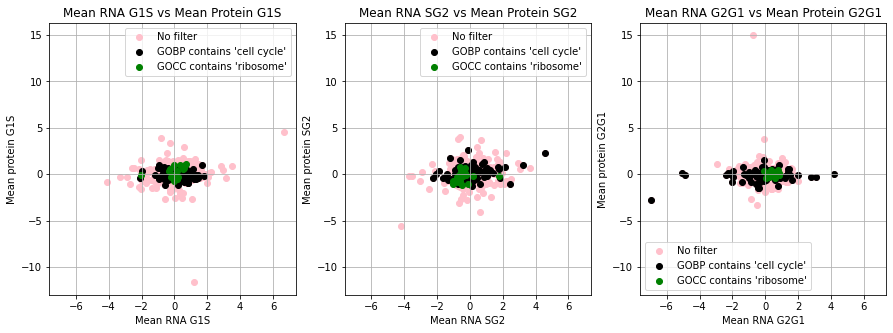

In [9]:
# Create new fields in the data for the differences in mean proteins and mean RNAs for G1-S, S-G2, G2-G1
df['mean_RNA_G1S'] = df.mean_RNA_S-df.mean_RNA_G1
df['mean_protein_G1S'] = df.mean_protein_S-df.mean_protein_G1
df['mean_RNA_SG2'] = df.mean_RNA_G2-df.mean_RNA_S
df['mean_protein_SG2'] = df.mean_protein_G2-df.mean_protein_S
df['mean_RNA_G2G1'] = df.mean_RNA_G1-df.mean_RNA_G2
df['mean_protein_G2G1'] = df.mean_protein_G1-df.mean_protein_G2

""" 
Creating a function to mean center and variance scale the values.
Mean centering is subtracting the mean of all values in the column from each value so the new mean
of the column will be 0. Varaince scaling means dividing by standard deviation of column
"""
meanCenterAndScale = lambda x : (x - x.mean())/ x.std()

# iloc is needed to select a colum in a dataframe
#[:,-6:] the comma refers to the column in the dataframe, so ,-6: means from the sixth last column to the last
df.iloc[:,-6:] = meanCenterAndScale(df.iloc[:,-6:])

# 3 separate graphs each for tthe pairs of preotein and rna qith three scatterplots. One for protein
# vs rna, another for the same with gobp and another for gocc
gobp = df[df.GOBP.str.contains('cell cycle')]
gocc = df[df.GOCC.str.contains('ribosome')]

fig, (ax7, ax8, ax9) = plt.subplots(1, 3, sharey=True, sharex=True)
fig.set_size_inches(15,5)

ax7.scatter(df.mean_RNA_G1S, df.mean_protein_G1S, color='pink', label='No filter')
ax7.scatter(gobp.mean_RNA_G1S, gobp.mean_protein_G1S, color='black', label='GOBP contains \'cell cycle\'')
ax7.scatter(gocc.mean_RNA_G1S, gocc.mean_protein_G1S, color='green', label='GOCC contains \'ribosome\'')

ax8.scatter(df.mean_RNA_SG2, df.mean_protein_SG2, color='pink', label='No filter')
ax8.scatter(gobp.mean_RNA_SG2, gobp.mean_protein_SG2, color='black', label='GOBP contains \'cell cycle\'')
ax8.scatter(gocc.mean_RNA_SG2, gocc.mean_protein_SG2, color='green', label='GOCC contains \'ribosome\'')

ax9.scatter(df.mean_RNA_G2G1, df.mean_protein_G2G1, color='pink', label='No filter')
ax9.scatter(gobp.mean_RNA_G2G1, gobp.mean_protein_G2G1, color='black', label='GOBP contains \'cell cycle\'')
ax9.scatter(gocc.mean_RNA_G2G1, gocc.mean_protein_G2G1, color='green', label='GOCC contains \'ribosome\'')

ax7.set_title('Mean RNA G1S vs Mean Protein G1S')
ax7.set_ylabel('Mean protein G1S')
ax7.set_xlabel('Mean RNA G1S')
ax7.legend()

ax8.set_title('Mean RNA SG2 vs Mean Protein SG2')
ax8.set_ylabel('Mean protein SG2')
ax8.set_xlabel('Mean RNA SG2')
#The statement below allows y axis to still show numbers although it's shared
ax8.yaxis.set_tick_params(which='both', labelbottom=True)
ax8.legend()

ax9.set_title('Mean RNA G2G1 vs Mean Protein G2G1')
ax9.set_ylabel('Mean protein G2G1')
ax9.set_xlabel('Mean RNA G2G1')
ax9.yaxis.set_tick_params(which='both', labelbottom=True)
ax9.legend()

ax7.grid()
ax8.grid()
ax9.grid()
plt.show()

G1 and G2 are phases in the cell cycle in which cells grow and where protein is synthesised, S phase is where cell DNA is replicated and RNA is synthesised throughout the stages (collectively called interphase). Not atking into account any outliers, the first two scatter graphs, G1S (Mean RNA G1S vs Mean Protein G1S) and SG2 (Mean RNA SG2 vs Mean Protein SG2) are the most similar out of the three for protein concentration when no filter is applied. This is because as mentioned previously, G1 and G2 are the satges where protein is synthesised so their protein concentration difference to phase S would be greater than their protein concentration difference to each other. The SG2 scatter graph has slightly more of a range in protein than G1S's for the all the sets; no filter, GOBP contains 'cell cycle' and GOCC contains 'ribosome'. This is potentially due to the fact that cell growth occurs faster in phase G2 than in G1. 

The range of protein in scatter graph G2G1 (Mean RNA G2G1 vs Mean Protein G2G1) is less than the other two, when discarding outliers, which is explained by the fact that both G1 and G2 are cell growth phases. The explanation for why the plots are not only more clustered towards 0 in the y direction but also the x, is because RNA synthesis peaks in phase S for DNA replication hence why the spread in the x direction is greater for scatter graphs G1S and SG2.